In [85]:
#numpy is numerical python, which lets us do math!
import numpy as np
#pandas is for reading in and manipulating dataframe
import pandas as pd
#matplotlib is a plotting library the originated in matlab
from matplotlib import pyplot as plt
#seaborn wraps around matplotlib so that we can make pretty plots more easliy
import seaborn as sns
#this little line of code lets us see the plots in the notebook
%matplotlib inline
#this uses seaborn (sns) to set the style for all the plots
sns.set_style(style='whitegrid')
from os.path import join


#less important for plotting
from glob import glob
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats
from statsmodels.sandbox.stats.multicomp import multipletests

In [2]:
def calculate_pvalues(df):
    from scipy.stats import pearsonr
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [6]:
data_dir = '/Users/Katie/Dropbox/Projects/physics-retrieval/data/out'

In [72]:
brain_df = pd.read_csv('{0}/brain-dem.csv'.format(data_dir), 
                       index_col=0, header=0)
iq_df = pd.read_excel('{0}/iq-measures-out.xlsx'.format(data_dir), 
                      index_col=0, header=0)
df = brain_df.join(iq_df)


In [73]:
#calculate the pairwise correlations for each variable in all_data
corrmat = df.corr(method='pearson')
corrmat.to_csv('{0}/all-corrmat.csv'.format(data_dir), sep=',')

#calculate the covariance matrix for all_data
covmat = df.cov()
covmat.to_csv('{0}/all-covmat.csv'.format(data_dir), sep=',')

In [74]:
#calculate the significance of correlations from corrmat
calculate_pvalues(df).to_csv('{0}/all-corr-pval.csv'.format(data_dir), sep=',')

In [132]:
uncorr_pval = calculate_pvalues(df)
uncorr_pval = uncorr_pval.as_matrix()
uncorr_pval = np.ravel(uncorr_pval)
corr_pval = multipletests(uncorr_pval, alpha=0.01, method='fdr_bh', returnsorted=False)

In [100]:
labels = ['limbic', 'orbitofrontal', 'basal ganglia', 'salience', 'hunger', 
          'motor learning', 'frontoparietal', 'hand', 'motor execution', 'higher order visual', 
          'lateral visual', 'medial visual', 'default mode',' cerebellum', 'left central executive', 
          'auditory', 'mouth', 'right central executive']

In [101]:
subjects = ['101', '102', '103', '104', '106', '107', '108', '110', '212',
            '214', '215', '216', '217', '218', '219', '320', '321', '323',
            '324', '325', '327', '328', '330', '331', '333', '334',
            '335', '336', '337', '338', '339', '340', '341', '342', '343', '344',
            '345', '346', '347', '348', '349', '350', '451', '453', '455',
            '458', '459', '460', '462', '463', '464', '465', '467',
            '468', '469', '470', '502', '503', '571', '572', '573', '574',
            '577', '578', '581', '582', '584', '585', '586', '587',
            '588', '589', '591', '592', '593', '594', '595', '596', '597',
            '598', '604', '605', '606', '607', '608', '609', '610', '612',
            '613', '614', '615', '617', '618', '619', '620', '621', '622',
            '623', '624', '625', '626', '627', '629', '630', '631', '633',
            '634']

#subjects = ['101', '102']

In [102]:
corrmats = {'phy': np.zeros((18,18)),
            'gen': np.zeros((18,18))}
conditions = ['gen', 'phy']

#Get average correlation maps per condition
for subject in subjects:
    for condition in conditions:
        subj_corrmat = np.genfromtxt('{0}/{1}/{1}-{2}-corrmat.csv'.format(data_dir, subject, condition), delimiter=' ')
        corrmats[condition] = corrmats[condition] + subj_corrmat
        
for condition in conditions:
    corrmats[condition] = corrmats[condition]/len(subjects)

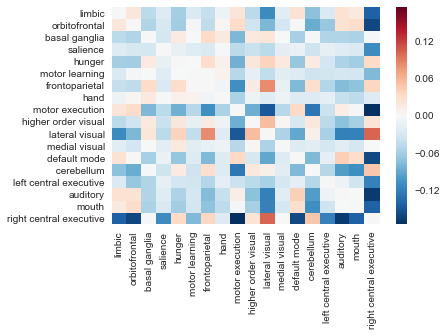

In [104]:
diff = corrmats['phy'] - corrmats['gen']
sns.heatmap(diff, xticklabels=labels, yticklabels=labels)

In [105]:
kurtosis = df.kurtosis(axis=0, skipna=True)

In [106]:
mean = df.mean(axis=0, skipna=True)

In [107]:
skew = df.skew(axis=0, skipna=True)

In [108]:
median = df.median(axis=0, skipna=True)

In [109]:
stdev = df.std(axis=0, skipna=True)

In [115]:
descriptives = pd.merge([mean, stdev, median, skew, kurtosis], axis=1)

TypeError: merge() got an unexpected keyword argument 'axis'

In [116]:
descriptives.to_csv('{0}/descriptives.csv'.format(data_dir), sep=',', 
                    header=['mean', 'stdev', 'median', 'skew', 'kurtosis'])

In [118]:
#check if relationships are linear/monotonic
from sklearn.isotonic import check_increasing

iso_IQ = {}
iso_VC = {}
iso_PR = {}

for item in df.keys():
    iso_IQ[item] = check_increasing(df[item], df['Full Scale IQ_2'])
    iso_VC[item] = check_increasing(df[item], df['Verbal Comprehension Sum_2'])
    iso_PR[item] = check_increasing(df[item], df['Perceptual Reasoning Sum_2'])

In [121]:
iso_PR

{'Age': False,
 u'Arithmetic sum_1': True,
 u'Arithmetic sum_2': True,
 u'Block design sum_1': True,
 u'Block design sum_2': True,
 u'Coding sum_1': True,
 u'Coding sum_2': True,
 u'Digit Span sum_1': True,
 u'Digit Span sum_2': True,
 u'Full Scale IQ_1': True,
 u'Full Scale IQ_2': True,
 u'Information sum_1': True,
 u'Information sum_2': True,
 u'Matrix Reasoning sum_1': True,
 u'Matrix Reasoning sum_2': True,
 u'Perceptual Reasoning Sum_1': True,
 u'Perceptual Reasoning Sum_2': True,
 u'Processing Speed Sum_1': True,
 u'Processing Speed Sum_2': True,
 'Sex': False,
 u'Similarities sum_1': True,
 u'Similarities sum_2': True,
 u'Symbol Search sum_1': True,
 u'Symbol Search sum_2': True,
 u'Verbal Comprehension Sum_1': True,
 u'Verbal Comprehension Sum_2': True,
 u'Visual puzzles sum_1': True,
 u'Visual puzzles sum_2': True,
 u'Vocab sum_1': True,
 u'Vocab sum_2': True,
 u'Working Memory Sum_1': True,
 u'Working Memory Sum_2': True,
 'fc default mode-left central executive gen': True,
 

In [22]:
#make lists for each type of anxiety of the other variables that have a monotonic relationship
#the other variables should be treated differently in a regression, as the relationship might
#be quadratic, quartic, etc.

BA_inc = []
BA_notmono = []
for item in iso_BA.keys():
    if iso_BA[item] == True:
        BA_inc.append(item)
    else:
        BA_notmono.append(item)
        
MA_inc = []
MA_notmono = []
for item in iso_MA.keys():
    if iso_MA[item] == True:
        MA_inc.append(item)
    else:
        MA_notmono.append(item)
        
SNA_inc = []
SNA_notmono = []
for item in iso_SNA.keys():
    if iso_SNA[item] == True:
        SNA_inc.append(item)
    else:
        SNA_notmono.append(item)
        
ScA_inc = []
ScA_notmono = []
for item in iso_ScA.keys():
    if iso_ScA[item] == True:
        ScA_inc.append(item)
    else:
        ScA_notmono.append(item)

In [23]:
MA_BA = list(set(MA_inc).intersection(BA_inc))

In [24]:
MA_BA_SNA = list(set(MA_BA).intersection(SNA_inc))
#these are the metrics that are monotonically correlated with all of the anxieties
inc_all = list(set(MA_BA_SNA).intersection(ScA_inc))

In [25]:
#what's the question we're asking? 
#is it "do brain measures contribute to explained vairance in student oucomes by anxiety?" 
#do brain measures explain anxiety?
#do brain measures + anxiety explain poor student outcomes?
#does anxeity explain poor student outcomes?

In [26]:
inc_all

['BAStandardized',
 'MAStandardized',
 'ScAStandardized',
 'Sex',
 'SNAStandardized',
 'DAN-DMN',
 'STEM Anxiety Composite ',
 'DMN-SN']

In [27]:
MA_BA_not = list(set(MA_notmono).intersection(BA_notmono))
MA_BA_SNA_not = list(set(MA_BA_not).intersection(SNA_notmono))
#these are the metrics that are NOT monotonically correlated with all of the anxieties
not_mono_all = list(set(MA_BA_SNA_not).intersection(ScA_notmono))

In [28]:
#these are the metrics that are NOT monotonically correlated with all of the anxieties
not_mono_all

['Phy48Grade', 'SN-DAN']

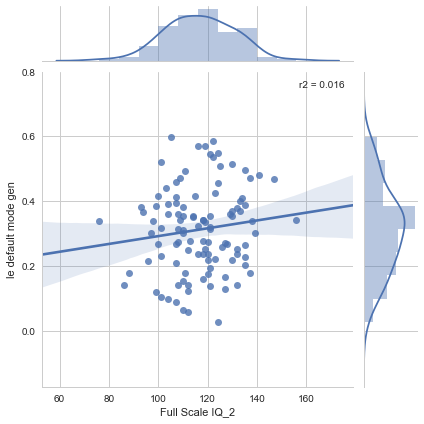

In [125]:
def r2(x, y):
    from scipy import stats
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot('Full Scale IQ_2', 'le default mode gen', kind='reg', data=df, stat_func=r2)

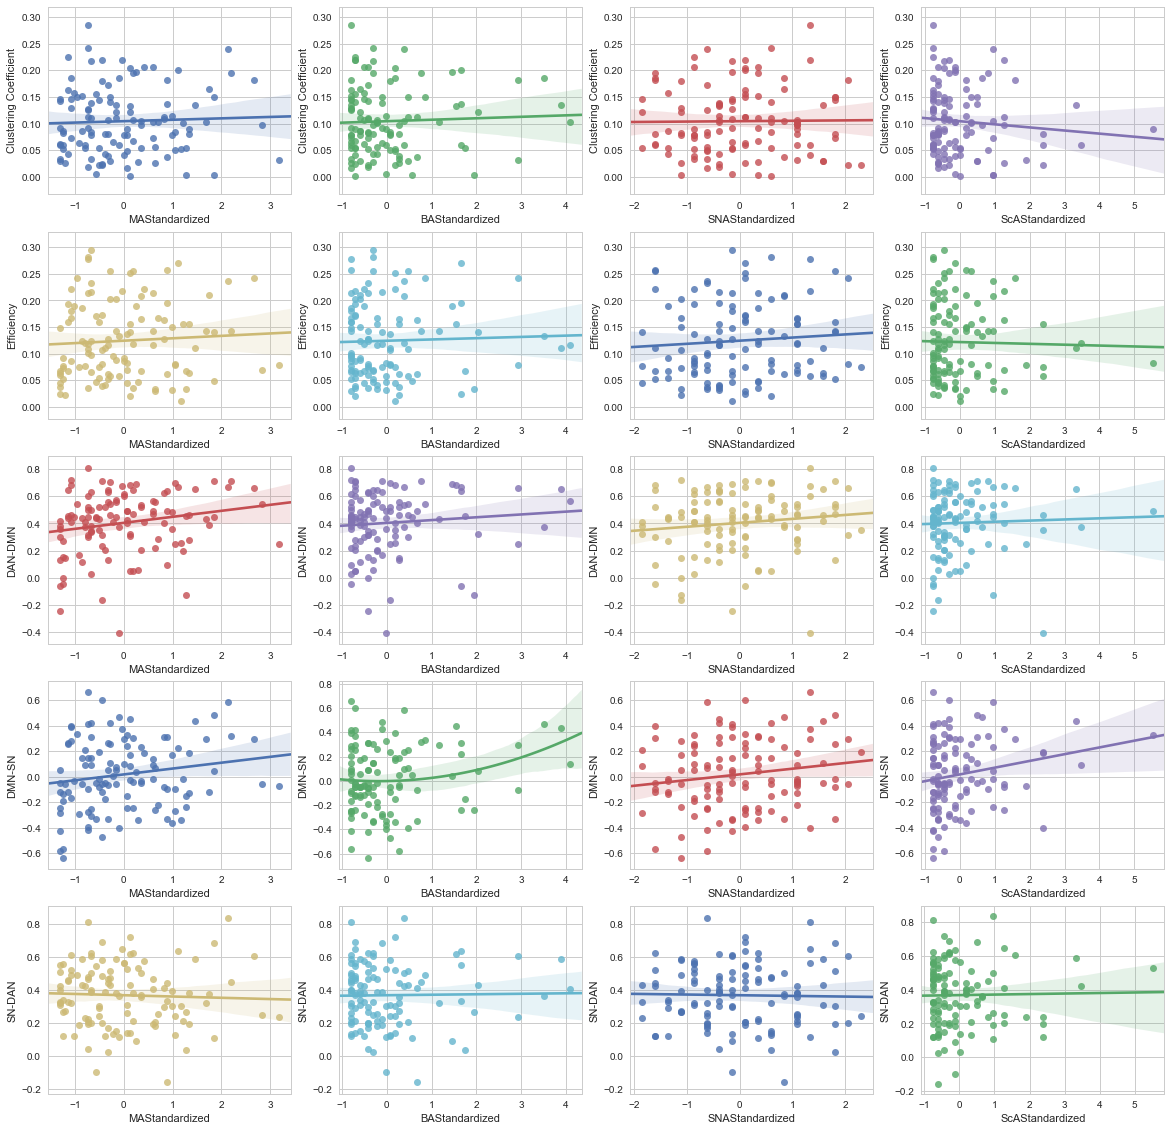

In [89]:
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(20,20), sharey=False)
g = sns.regplot('MAStandardized', 'Clustering Coefficient', data=df, ax=ax[0][0], fit_reg=True)
g = sns.regplot('BAStandardized', 'Clustering Coefficient', data=df, ax=ax[0][1], fit_reg=True)
g = sns.regplot('SNAStandardized', 'Clustering Coefficient', data=df, ax=ax[0][2], fit_reg=True)
g = sns.regplot('ScAStandardized', 'Clustering Coefficient', data=df, ax=ax[0][3], fit_reg=True)
g = sns.regplot('MAStandardized', 'Efficiency', data=df, ax=ax[1][0], fit_reg=True)
g = sns.regplot('BAStandardized', 'Efficiency', data=df, ax=ax[1][1], fit_reg=True)
g = sns.regplot('SNAStandardized', 'Efficiency', data=df, ax=ax[1][2], fit_reg=True)
g = sns.regplot('ScAStandardized', 'Efficiency', data=df, ax=ax[1][3], robust=True)
g = sns.regplot('MAStandardized', 'DAN-DMN', data=df, ax=ax[2][0], fit_reg=True)
g = sns.regplot('BAStandardized', 'DAN-DMN', data=df, ax=ax[2][1], fit_reg=True)
g = sns.regplot('SNAStandardized', 'DAN-DMN', data=df, ax=ax[2][2], fit_reg=True)
g = sns.regplot('ScAStandardized', 'DAN-DMN', data=df, ax=ax[2][3], fit_reg=True)
g = sns.regplot('MAStandardized', 'DMN-SN', data=df, ax=ax[3][0], fit_reg=True)
g = sns.regplot('BAStandardized', 'DMN-SN', data=df, ax=ax[3][1], fit_reg=True, order=2)
g = sns.regplot('SNAStandardized', 'DMN-SN', data=df, ax=ax[3][2], fit_reg=True)
g = sns.regplot('ScAStandardized', 'DMN-SN', data=df, ax=ax[3][3], fit_reg=True)
g = sns.regplot('MAStandardized', 'SN-DAN', data=df, ax=ax[4][0], fit_reg=True)
g = sns.regplot('BAStandardized', 'SN-DAN', data=df, ax=ax[4][1], fit_reg=True)
g = sns.regplot('SNAStandardized', 'SN-DAN', data=df, ax=ax[4][2], fit_reg=True)
g = sns.regplot('ScAStandardized', 'SN-DAN', data=df, ax=ax[4][3], fit_reg=True)

In [81]:
df = df.replace({'Sex': {0: 'M'}})
df = df.replace({'Sex': {1: 'F'}})

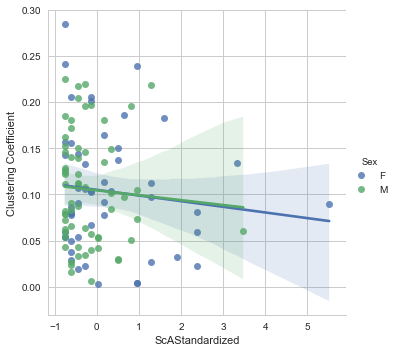

In [83]:
sns.lmplot(x="ScAStandardized", y="Clustering Coefficient", hue="Sex", data=df, truncate=True)

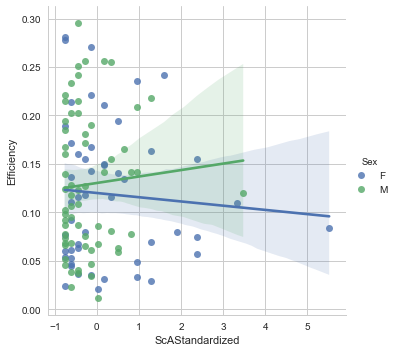

In [66]:
sns.lmplot(x="ScAStandardized", y="Efficiency", hue="Sex", data=df, truncate=True)


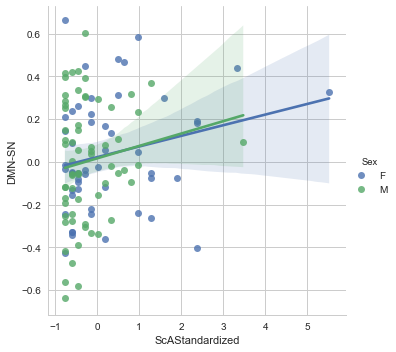

In [84]:
sns.lmplot(x="ScAStandardized", y="DMN-SN", hue="Sex", data=df, truncate=True)

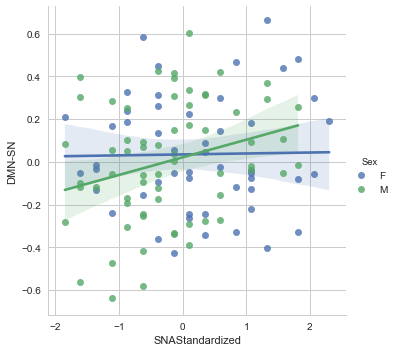

In [64]:
sns.lmplot(x="SNAStandardized", y="DMN-SN", hue="Sex", data=df, truncate=True)


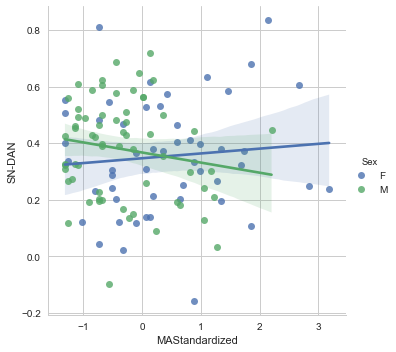

In [68]:
sns.lmplot(x="MAStandardized", y="SN-DAN", hue="Sex", data=df, truncate=True)

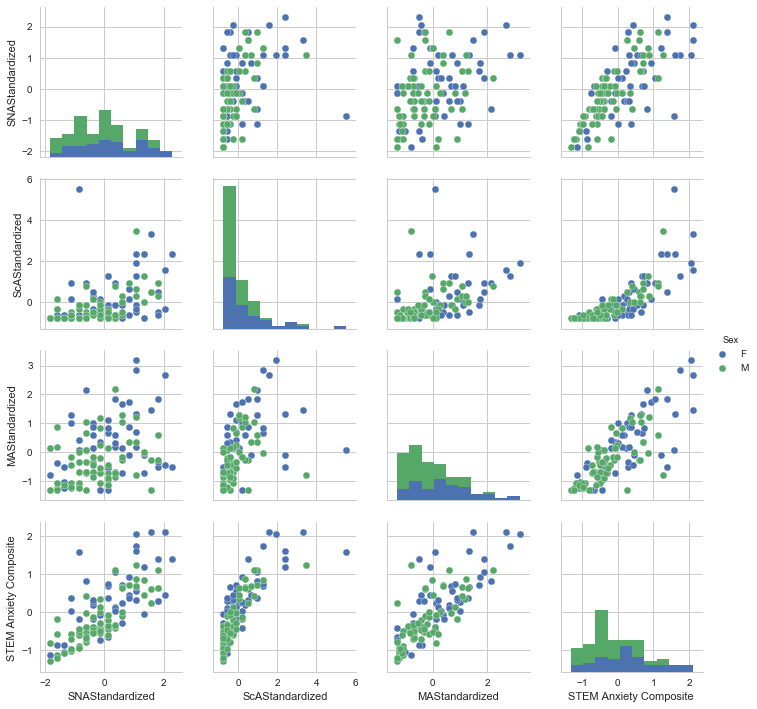

In [72]:
sns.pairplot(data=df, hue='Sex', 
             vars=['SNAStandardized', 'ScAStandardized', 'MAStandardized', 'STEM Anxiety Composite '])

In [71]:
df.keys()

Index([u'Sex', u'Phy48Grade', u'SNAStandardized', u'BAStandardized',
       u'ScAStandardized', u'MAStandardized', u'STEM Anxiety Composite ',
       u'Clustering Coefficient', u'Efficiency', u'DAN-DMN', u'DMN-SN',
       u'SN-DAN'],
      dtype='object')